# Import Libraries

In [1]:
# Downloading, moving and unzipping files
import webbrowser
from time import sleep
import shutil
import os
#from zipfile import ZipFile
import glob

# DataFrame exploration and manipulation
import pandas as pd
import numpy as np
import datetime as dt

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Upload Data

In [2]:
# Climate data
weather_df = pd.read_csv('../../BikeSharing/MiBici/Weather/NOAA_NCEI_Climate_clean.csv', encoding='latin-1')

# COVID-19 data
covid_df = pd.read_csv('../../BikeSharing/MiBici/COVID/COVID_daily_cases_clean.csv', encoding='latin-1')

In [2]:
# obtain the csv data file names
path = "../../BikeSharing/MiBici/BikeTrips/CleanData/CleanerData/"
files = [file for file in os.listdir(path) if file.endswith(".csv")]

# Data Viz

For every visualization with bike data, you'll need to loop through files and run each df through a function that'll arrange your data in the way that you need for your analysis

## Bike Trip Counts

### MiBici Data

In [4]:
# Loop through each file, save as dataframe, and obtain the row count
output = pd.Series(name="Rows", dtype=int)
for file in files:
    df = pd.read_csv(os.path.join(path, file), encoding='latin-1')
    output.at[file.replace(".csv", "")] = df.shape[0]
output.at["Total"] = output.sum()

In [5]:
# Number of trips in date range
print('# Observations')
print('2015-2022:', output.at["Total"])
print('2017-2022:', output[25:85].sum())
print('2018-2022:', output[37:85].sum())
print('2019-2022:', output[49:85].sum())

# Observations
2015-2022: 20079420
2017-2022: 16607153
2018-2022: 14090619
2019-2022: 10687134


<AxesSubplot:>

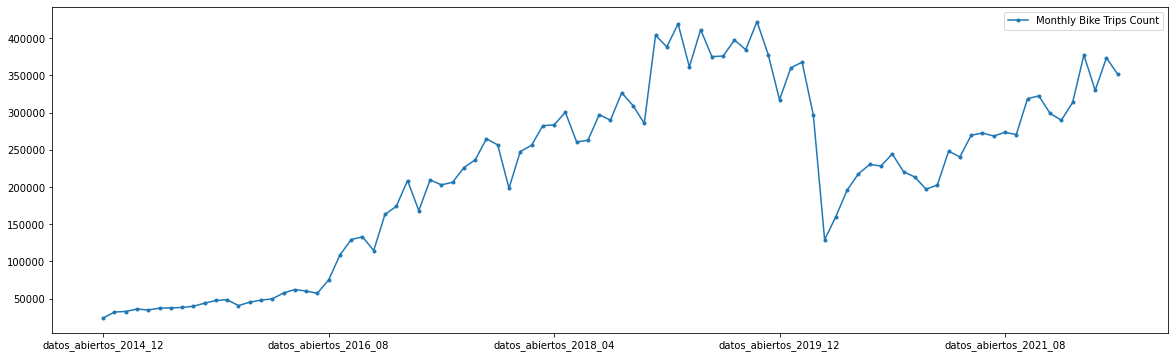

In [6]:
fig, ax = plt.subplots(figsize=(20, 6))
output[:-1].plot(label="Monthly Bike Trips Count", legend=True, marker='.')   # BLUE LINE

<AxesSubplot:>

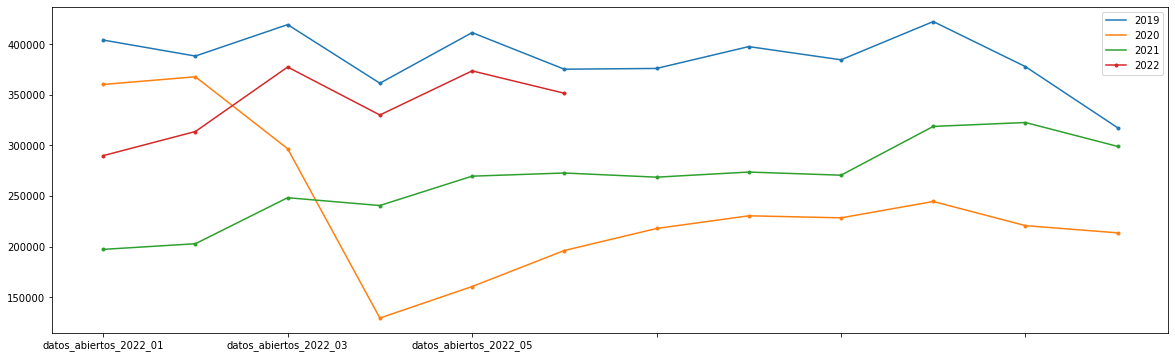

In [7]:
fig, ax = plt.subplots(figsize=(20, 6))

output[49:61].plot(label="2019", legend=True, marker='.')   # BLUE LINE
output[61:73].plot(label="2020", legend=True, marker='.')   # ORANGE LINE
output[73:85].plot(label="2021", legend=True, marker='.')   # GREEN LINE
output[85:91].plot(label="2022", legend=True, marker='.')   # RED LINE

#### Daily MiBici Counts

In [53]:
# Loop through each file, save as dataframe, and obtain the row count for 2017-2021
output = pd.Series(name="Rows", dtype=int)

for file in files[25:85]:
    df = pd.read_csv(os.path.join(path, file), encoding='latin-1')
    df['Start_Time'] = pd.to_datetime(df['Start_Time']).dt.strftime('%Y-%m-%d')
    output = output.append(df.groupby(['Start_City', 'Start_Time']).count().iloc[:,0])
    
    #output = output.append(df.groupby(pd.to_datetime(df['Start_Time']).dt.strftime('%Y-%m-%d')).count().iloc[:,0])


In [54]:
output

(Guadalajara, 2017-01-01)    1219
(Guadalajara, 2017-01-02)    3831
(Guadalajara, 2017-01-03)    4584
(Guadalajara, 2017-01-04)    4871
(Guadalajara, 2017-01-05)    5093
                             ... 
(Zapopan, 2021-12-27)         581
(Zapopan, 2021-12-28)         639
(Zapopan, 2021-12-29)         617
(Zapopan, 2021-12-30)         571
(Zapopan, 2021-12-31)         408
Length: 5478, dtype: int64

In [55]:
# export data
# output.to_csv('../../BikeSharing/MiBici/question_one_full.csv')

### COVID & Weather

#### Format Weather Data for Tableau

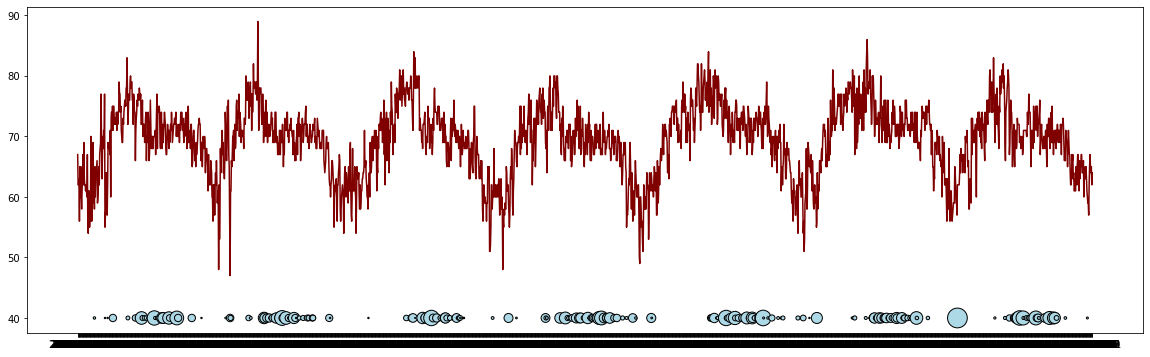

In [136]:
fig, ax = plt.subplots(figsize=(20, 6))

y = [40]*len(weather_df.PRCP) 
plt.plot(weather_df.Date, weather_df.TAVG, color='maroon', label='Temperature (F)')   # RED LINE
plt.scatter(weather_df.Date, y, s = weather_df.PRCP*100, color='lightblue', edgecolor='black', label='Rainfall (in)')  # BLUE DOT


In [137]:
weather_df.head(5)

,Unnamed: 0,Date,PRCP,TAVG,TMAX,TMIN
0,292,2014-12-01,0.0,67,82.0,41.0
1,293,2014-12-02,0.0,62,82.0,41.0
2,294,2014-12-03,0.0,62,79.0,42.0
3,295,2014-12-04,0.0,63,79.0,42.0
4,296,2014-12-05,0.0,56,80.0,44.0


In [138]:
# Drop leftover index column
weather_df.drop(weather_df.columns[[0]], axis = 1, inplace = True)

In [144]:
# Add a column for prcp x axis values
weather_df.insert(2, "X_PRCP", [40]*len(weather_df.PRCP), True)

In [146]:
# Truncate data for dates between '2017-01-01' and '2021-12-31'
weather_df = weather_df[weather_df['Date'] > '2016-12-31']
weather_df = weather_df[weather_df['Date'] < '2022-01-01']

In [148]:
# Reset indicies
weather_df.reset_index(drop=True, inplace=True)

In [150]:
# export data
# weather_df.to_csv('../../BikeSharing/MiBici/Weather/NOAA_NCEI_Climate_clean_shorter.csv', index=False)

#### Format COVID Data for Tableau

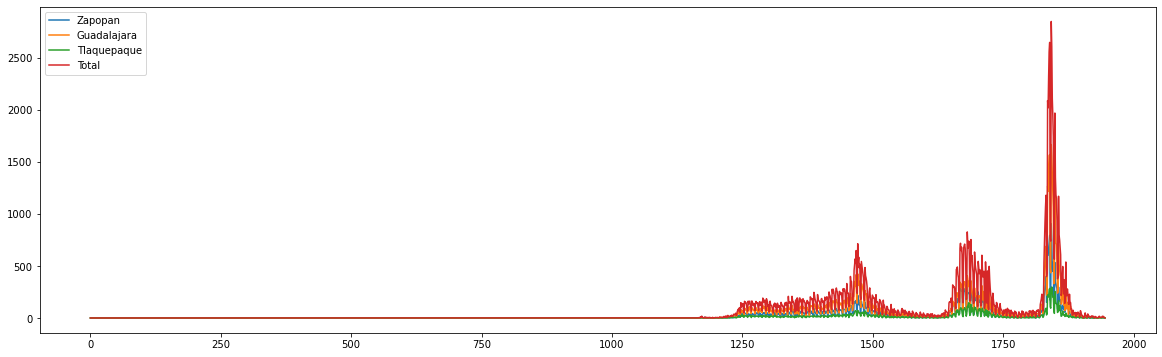

In [102]:
# Plot original data
fig, ax = plt.subplots(figsize=(20, 6))

covid_df.Zapopan.plot(label="Zapopan", legend=True)
covid_df.Guadalajara.plot(label="Guadalajara", legend=True)
covid_df.Tlaquepaque.plot(label="Tlaquepaque", legend=True)
covid_df.Total.plot(label="Total", legend=True)

plt.show()

In [103]:
covid_df.head(5)

,Date,Zapopan,Guadalajara,Tlaquepaque,Total
0,2017-01-01,0,0,0,0
1,2017-01-02,0,0,0,0
2,2017-01-03,0,0,0,0
3,2017-01-04,0,0,0,0
4,2017-01-05,0,0,0,0


In [104]:
# Drop leftover index column
covid_df.drop(covid_df.columns[[0]], axis = 1, inplace = True)

In [105]:
# Create temp dataframe of zeros for COVID data before first data collection '2020-02-25'
# to later append to true covid data
temp_df = pd.DataFrame({'Date': pd.date_range('2017-01-01', '2020-02-25', freq='D'),
                        'Zapopan': [0]*len(pd.date_range('2017-01-01', '2020-02-25', freq='D')),
                        'Guadalajara': [0]*len(pd.date_range('2017-01-01', '2020-02-25', freq='D')),
                        'Tlaquepaque': [0]*len(pd.date_range('2017-01-01', '2020-02-25', freq='D')),
                        'Total': [0]*len(pd.date_range('2017-01-01', '2020-02-25', freq='D')),
                       })

In [106]:
# Ensure data has same date type
temp_df["Date"] = pd.to_datetime(temp_df["Date"]).dt.strftime('%Y-%m-%d')
covid_df["Date"] = pd.to_datetime(covid_df["Date"]).dt.strftime('%Y-%m-%d')

KeyError: 'Date'

In [ ]:
# Append temp data to COVID data
covid_df = temp_df.append(covid_df)

In [ ]:
covid_df

In [96]:
# Reset indicies
covid_df.reset_index(drop=True, inplace=True)

In [100]:
# Truncate data for date < '2022-01-01'
weather_df[weather_df['Date'] < '2022-12-31']

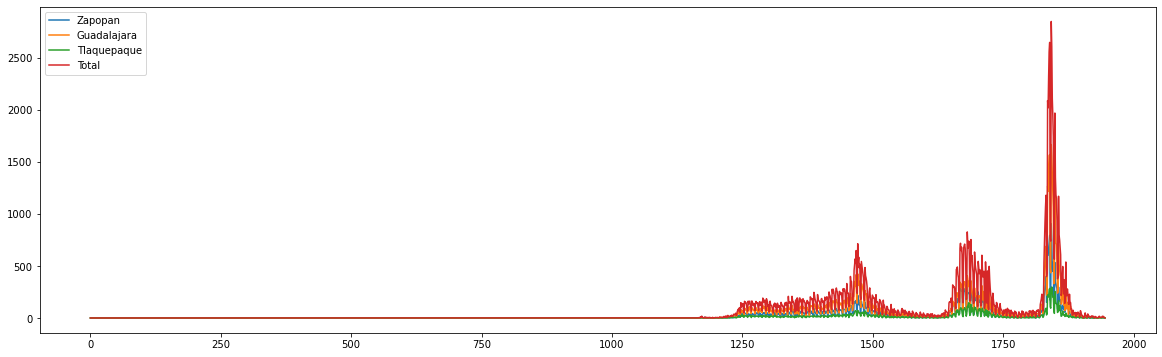

In [71]:
# PLot new dataframe
fig, ax = plt.subplots(figsize=(20, 6))

covid_df.Zapopan.plot(label="Zapopan", legend=True)
covid_df.Guadalajara.plot(label="Guadalajara", legend=True)
covid_df.Tlaquepaque.plot(label="Tlaquepaque", legend=True)
covid_df.Total.plot(label="Total", legend=True)

plt.show()

In [73]:
# Conver wide dataframe to long dataframe & export data
# covid_long_df = pd.melt(covid_df, id_vars='Date', value_vars=['Total', 'Guadalajara', 'Tlaquepaque', 'Zapopan'])
# covid_long_df.to_csv('../../BikeSharing/MiBici/COVID/COVID_daily_cases_clean_long.csv', index=False)

## Average Trip Duration

## MiBici Hourly Usage

Hourly usage across all years

In [3]:
# Loop through each file, temporarily save as dataframe, and obtain the number of bikes per hour
hourly = pd.Series(name="Rows", dtype=int)
for file in files:
    df = pd.read_csv(os.path.join(path, file), encoding='latin-1')
    hourly = pd.concat([hourly, df['Start_Hour'].value_counts(sort=False)], axis=1).sum(axis=1)

<AxesSubplot:>

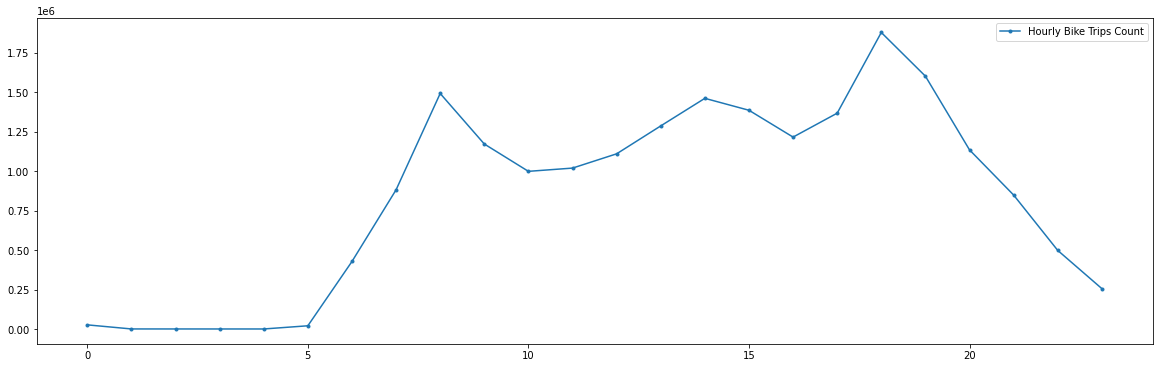

In [4]:
fig, ax = plt.subplots(figsize=(20, 6))
hourly.plot(label="Hourly Bike Trips Count", legend=True, marker='.')   # BLUE LINE

Hourly usage during the weekday vs the weekend

In [5]:
# Loop through each file, temporarily save as dataframe, and obtain the number of bikes per hour
hourly_byday = pd.Series(name="Rows", dtype=int)
for file in files:
    df = pd.read_csv(os.path.join(path, file), encoding='latin-1')
    hourly_byday = pd.concat([hourly_byday, df.groupby(['Start_Weekday', 'Start_Hour']).size()], axis=1).sum(axis=1)

<AxesSubplot:>

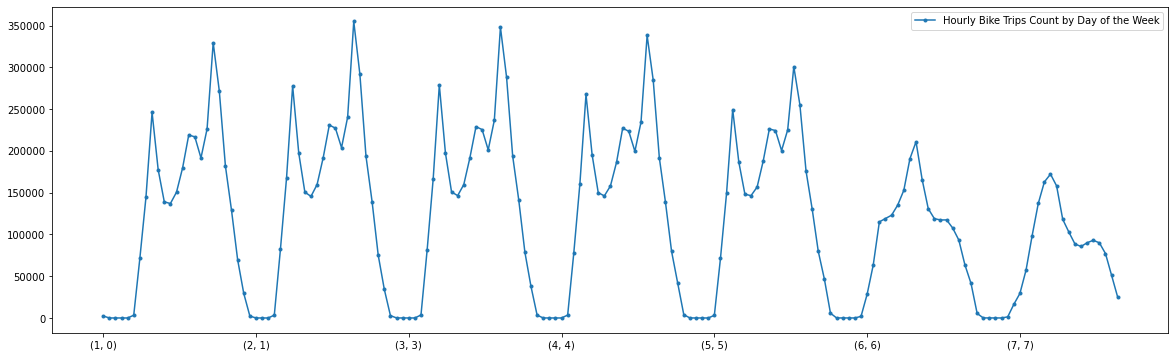

In [6]:
fig, ax = plt.subplots(figsize=(20, 6))
hourly_byday.plot(label="Hourly Bike Trips Count by Day of the Week", legend=True, marker='.')   # BLUE LINE

### Circular HeatMap

**Circular heatmap:** for efficiency purposes, cycling behaviors between March 2020 - May 2020 (the only lockdown in Mexico) will be compared to the same months in other years to see how they potentially differ.

In [7]:
# for each file in my folder, find the files that are for march (03), april (04), and may (05)
# for 2017-2021
matchers = ['03','04', '05']
matching = [s for s in files[25:85] if any(xs in s for xs in matchers)]

In [1]:
# Loop through each file, temporarily save as dataframe, and obtain the number of bikes per hour
df_temp = pd.DataFrame()
df_hourly = pd.DataFrame()
for file in matching:
    df = pd.read_csv(os.path.join(path, file), encoding='latin-1')
    df["Start_Time"] = pd.to_datetime(df.Start_Time)
    
    df_temp["Weekday"]       = df["Start_Time"].dt.strftime("%A")
    df_temp["Week of Year"]  = df["Start_Time"].dt.strftime("Week %W")
    df_temp["Year"]          = df["Start_Time"].dt.strftime("%Y")
    df_temp["Date"]          = df["Start_Time"].dt.strftime("%Y-%m-%d")
    df_temp["Date_Hr_Count"] = df["Start_Time"].dt.strftime("%Y-%m-%d %H:00")
    df_temp["Hr"]            = df["Start_Time"].dt.strftime("%H:00")
    
    df_hourly = pd.concat([df_hourly, df_temp], axis=0)

NameError: name 'pd' is not defined

In [10]:
df_hourly

,Day & Hour,Week of Year,Date,Date_Hr_Count,Hr
0,Wednesday 08:00,Week 09,2017-03-01,2017-03-01 08:00,08:00
1,Wednesday 14:00,Week 09,2017-03-01,2017-03-01 14:00,14:00
2,Wednesday 19:00,Week 09,2017-03-01,2017-03-01 19:00,19:00
3,Wednesday 19:00,Week 09,2017-03-01,2017-03-01 19:00,19:00
4,Thursday 19:00,Week 09,2017-03-02,2017-03-02 19:00,19:00
...,...,...,...,...,...
208789,Saturday 15:00,Week 18,2021-05-08,2021-05-08 15:00,15:00
208790,Monday 17:00,Week 19,2021-05-10,2021-05-10 17:00,17:00
208791,Tuesday 08:00,Week 19,2021-05-11,2021-05-11 08:00,08:00
208792,Tuesday 15:00,Week 19,2021-05-11,2021-05-11 15:00,15:00


In [11]:
df_hourly.groupby(['Date_Hr_Count','Hr']).size()

Date_Hr_Count     Hr   
2017-03-01 06:00  06:00    207
2017-03-01 07:00  07:00    391
2017-03-01 08:00  08:00    663
2017-03-01 09:00  09:00    475
2017-03-01 10:00  10:00    353
                          ... 
2021-05-31 19:00  19:00    698
2021-05-31 20:00  20:00    505
2021-05-31 21:00  21:00    363
2021-05-31 22:00  22:00    193
2021-05-31 23:00  23:00     94
Length: 8490, dtype: int64

In [12]:
df_hr_count = pd.DataFrame()
df_hr_count = df_hourly.groupby(['Date_Hr_Count','Hr']).size()

In [13]:
df_hr_count = pd.DataFrame(df_hr_count, columns = ['Count'])

In [14]:
df_hr_count.reset_index(level=['Date_Hr_Count','Hr'], inplace=True)
df_hr_count

,Date_Hr_Count,Hr,Count
0,2017-03-01 06:00,06:00,207
1,2017-03-01 07:00,07:00,391
2,2017-03-01 08:00,08:00,663
3,2017-03-01 09:00,09:00,475
4,2017-03-01 10:00,10:00,353
...,...,...,...
8485,2021-05-31 19:00,19:00,698
8486,2021-05-31 20:00,20:00,505
8487,2021-05-31 21:00,21:00,363
8488,2021-05-31 22:00,22:00,193


In [25]:
# Turn Hr column to type integer
df_hr_count['Hr'] = df_hr_count['Hr'].apply(lambda x: int(x[:2]))

In [26]:
# Extract year from Date column and create new column 
df_hr_count['Year'] = df_hr_count['Date_Hr_Count'].apply(lambda x: int(x[:4]))

In [33]:
# Turn Date_Hr_Count column into type datetime 
df_hr_count['Date_Hr_Count'] = pd.to_datetime(df_hr_count['Date_Hr_Count'])

In [54]:
df_hr_count['Date'] = df_hr_count.Date_Hr_Count.dt.date

In [48]:
# add column that assigns an index value to each row based on the date (Y-m-d) that the value is a part of
df_hr_count['day_index'] = df_hr_count.groupby('Date').ngroup() + 1

In [55]:
df_hr_count

,Date_Hr_Count,Hr,Count,Year,day_index,Date
0,2017-03-01 06:00:00,6,207,2017,1,2017-03-01
1,2017-03-01 07:00:00,7,391,2017,1,2017-03-01
2,2017-03-01 08:00:00,8,663,2017,1,2017-03-01
3,2017-03-01 09:00:00,9,475,2017,1,2017-03-01
4,2017-03-01 10:00:00,10,353,2017,1,2017-03-01
...,...,...,...,...,...,...
8485,2021-05-31 19:00:00,19,698,2021,460,2021-05-31
8486,2021-05-31 20:00:00,20,505,2021,460,2021-05-31
8487,2021-05-31 21:00:00,21,363,2021,460,2021-05-31
8488,2021-05-31 22:00:00,22,193,2021,460,2021-05-31


In [58]:
NEED TO FIGURE OUT HOW TO ADD MISSING HOURS (USUALLY BETW 1-6 AM) TO DATASET AND INCLUDE VALUE ZERO

df_hr_count.groupby('Date_Hr_Count').apply(lambda x : x.set_index('DateTime').resample('H').mean().fillna(0))

KeyError: "None of ['DateTime'] are in the columns"

In [50]:
# export data
# df_hr_count.to_csv('../../BikeSharing/MiBici/question_three.csv', index=False)

### other stuff

In [123]:
df_hr_count.iloc[681:8471,:]

,Date_Hr_Count,Hr,Count
6815,2019-03-01 06:00,06:00,43
6816,2019-03-01 07:00,07:00,63
6817,2019-03-01 08:00,08:00,104
6818,2019-03-01 09:00,09:00,73
6819,2019-03-01 10:00,10:00,63
...,...,...,...
8466,2019-05-31 19:00,19:00,87
8467,2019-05-31 20:00,20:00,71
8468,2019-05-31 21:00,21:00,51
8469,2019-05-31 22:00,22:00,32


In [142]:
df_hr_count['Date_Hr_Count'] = pd.to_datetime(df_hr_count['Date_Hr_Count']).dt.strftime("%Y-%m-%d")

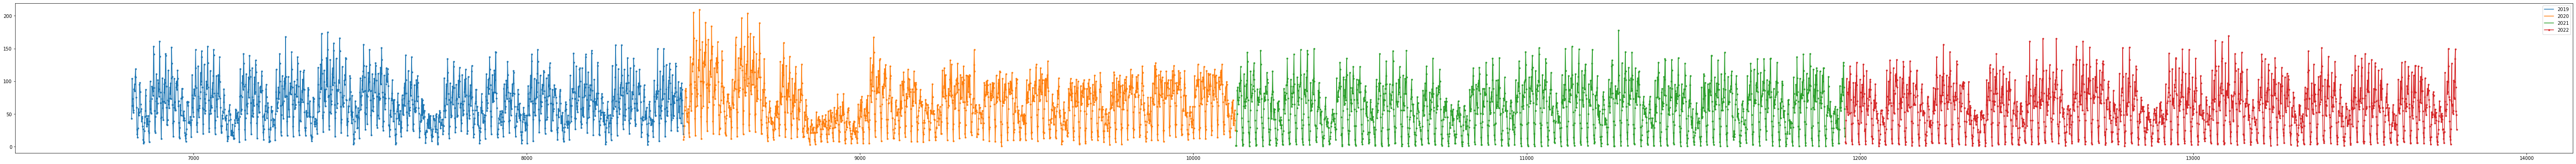

In [128]:
fig, ax = plt.subplots(figsize=(20, 1))

df_hr_count.Count.iloc[6815:8471  ].plot(label="2019", legend=True, marker='.')   # BLUE LINE
df_hr_count.Count.iloc[8471:10127 ].plot(label="2020", legend=True, marker='.')   # ORANGE LINE
df_hr_count.Count.iloc[10128:11956].plot(label="2021", legend=True, marker='.')   # GREEN LINE
df_hr_count.Count.iloc[11956:     ].plot(label="2022", legend=True, marker='.')   # RED LINE

plt.show()

In [146]:
df_hr_count.iloc[6815:8471  ].to_csv('Hourly_2019.csv', encoding='utf-8', index=False)
df_hr_count.iloc[8471:10127 ].to_csv('Hourly_2020.csv', encoding='utf-8', index=False)
df_hr_count.iloc[10128:11956].to_csv('Hourly_2021.csv', encoding='utf-8', index=False)
df_hr_count.iloc[11956:     ].to_csv('Hourly_2022.csv', encoding='utf-8', index=False)


In [144]:
df_hr_count.iloc[6815:8471  ]

,Date_Hr_Count,Hr,Count
6815,2019-03-01,06:00,43
6816,2019-03-01,07:00,63
6817,2019-03-01,08:00,104
6818,2019-03-01,09:00,73
6819,2019-03-01,10:00,63
...,...,...,...
8466,2019-05-31,19:00,87
8467,2019-05-31,20:00,71
8468,2019-05-31,21:00,51
8469,2019-05-31,22:00,32


In [ ]:
# Convert Start_Time to type datetime 
df["Start_Time"] = pd.to_datetime(df.Start_Time)

In [29]:
df_hrmap = pd.DataFrame()

In [30]:
# create relevant time columns
df_hrmap["Day & Hour"] = df["Start_Time"].dt.strftime("%A %H:00")
df_hrmap["Week of Year"] = df["Start_Time"].dt.strftime("Week %W")
df_hrmap["Date"] = df["Start_Time"].dt.strftime("%Y-%m-%d")
df_hrmap["Date_Hr_Count"] = df["Start_Time"].dt.strftime("%Y-%m-%d %H:00")
df_hrmap["Hr"] = df["Start_Time"].dt.strftime("%H:00")

In [37]:
df_hrmap.groupby(['Date_Hr_Count','Hr']).size()

Date_Hr_Count     Hr   
2021-04-01 00:00  00:00     40
2021-04-01 05:00  05:00     15
2021-04-01 06:00  06:00    113
2021-04-01 07:00  07:00    236
2021-04-01 08:00  08:00    329
                          ... 
2021-04-30 19:00  19:00    730
2021-04-30 20:00  20:00    604
2021-04-30 21:00  21:00    503
2021-04-30 22:00  22:00    291
2021-04-30 23:00  23:00    146
Length: 600, dtype: int64

<AxesSubplot:xlabel='Date_Hr_Count,Hr'>

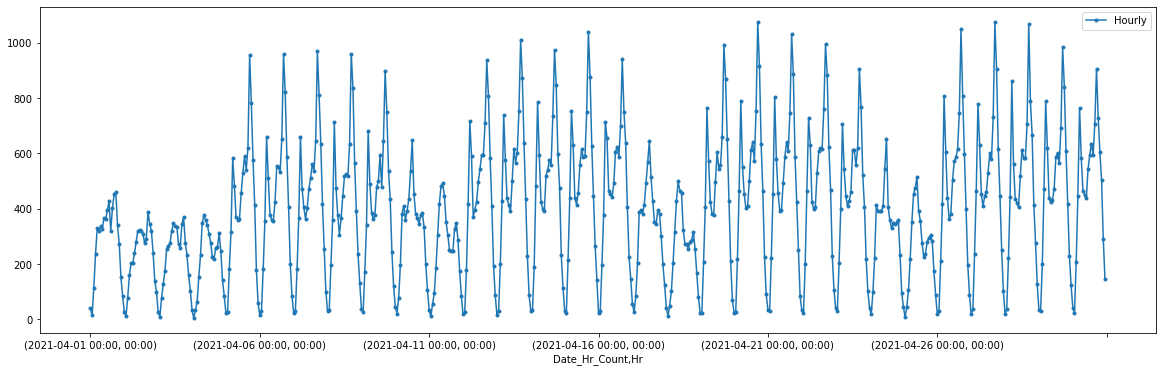

In [38]:
fig, ax = plt.subplots(figsize=(20, 6))
df_hrmap.groupby(['Date_Hr_Count','Hr']).size().plot(label="Hourly", legend=True, marker='.')   # BLUE LINE

In [ ]:

# for each of these files, count the number of trips within an hour (Start_hour) for each day (Start_Time)
#  some combo of df.groupby('x').size().to_dict() YOU CAN GROUP BY MORE THAN ONE VARIABLE


In [ ]:
# Loop through each file, temporarily save as dataframe, and obtain the number of bikes per hour
hourly_byday = pd.Series(name="Rows", dtype=int)
for file in files:
    if 
    df = pd.read_csv(os.path.join(path, file), encoding='latin-1')
    hourly_byday = pd.concat([hourly_byday, df.groupby(['Start_Weekday', 'Start_Hour']).size()], axis=1).sum(axis=1)

In [6]:
files

['datos_abiertos_2014_12.csv',
 'datos_abiertos_2015_01.csv',
 'datos_abiertos_2015_02.csv',
 'datos_abiertos_2015_03.csv',
 'datos_abiertos_2015_04.csv',
 'datos_abiertos_2015_05.csv',
 'datos_abiertos_2015_06.csv',
 'datos_abiertos_2015_07.csv',
 'datos_abiertos_2015_08.csv',
 'datos_abiertos_2015_09.csv',
 'datos_abiertos_2015_10.csv',
 'datos_abiertos_2015_11.csv',
 'datos_abiertos_2015_12.csv',
 'datos_abiertos_2016_01-1.csv',
 'datos_abiertos_2016_02.csv',
 'datos_abiertos_2016_03.csv',
 'datos_abiertos_2016_04.csv',
 'datos_abiertos_2016_05.csv',
 'datos_abiertos_2016_06.csv',
 'datos_abiertos_2016_07.csv',
 'datos_abiertos_2016_08.csv',
 'datos_abiertos_2016_09.csv',
 'datos_abiertos_2016_10.csv',
 'datos_abiertos_2016_11.csv',
 'datos_abiertos_2016_12.csv',
 'datos_abiertos_2017_01.csv',
 'datos_abiertos_2017_02.csv',
 'datos_abiertos_2017_03.csv',
 'datos_abiertos_2017_04-1.csv',
 'datos_abiertos_2017_05.csv',
 'datos_abiertos_2017_06.csv',
 'datos_abiertos_2017_07.csv',
 'da

In [10]:
matching = [s for s in files if "03" in s]

In [12]:
matching.append([s for s in files if "04" in s])
matching.append([s for s in files if "05" in s])

In [14]:
matchers = ['03','04', '05']
matching = [s for s in files if any(xs in s for xs in matchers)]

In [15]:
matching

['datos_abiertos_2015_03.csv',
 'datos_abiertos_2015_04.csv',
 'datos_abiertos_2015_05.csv',
 'datos_abiertos_2016_03.csv',
 'datos_abiertos_2016_04.csv',
 'datos_abiertos_2016_05.csv',
 'datos_abiertos_2017_03.csv',
 'datos_abiertos_2017_04-1.csv',
 'datos_abiertos_2017_05.csv',
 'datos_abiertos_2018_03.csv',
 'datos_abiertos_2018_04.csv',
 'datos_abiertos_2018_05.csv',
 'datos_abiertos_2019_03.csv',
 'datos_abiertos_2019_04.csv',
 'datos_abiertos_2019_05.csv',
 'datos_abiertos_2020_03.csv',
 'datos_abiertos_2020_04.csv',
 'datos_abiertos_2020_05.csv',
 'datos_abiertos_2021_03.csv',
 'datos_abiertos_2021_04.csv',
 'datos_abiertos_2021_05.csv',
 'datos_abiertos_2022_03.csv',
 'datos_abiertos_2022_04.csv',
 'datos_abiertos_2022_05.csv']

## Station Popularity

### General

In [3]:
# Loop through each file, temporarily save as dataframe
startEnd_df = pd.DataFrame()

for file in files[25:85]:
    df = pd.read_csv(os.path.join(path, file), encoding='latin-1')
    
    # obtain counts of start/end trip combos
    df = df.groupby(['Start_Station_ID', 'End_Station_ID']).size().to_frame(name = 'size').reset_index()
    
    # Add Date to dataframe and turn into type datetime
    df.insert(0, 'Date', file[15:19])
    df['Date'] = pd.to_datetime(df['Date'])
    
    # concatenate to full dataframe
    startEnd_df = pd.concat([startEnd_df, df], axis=0)

In [4]:
startEnd_df

,Date,Start_Station_ID,End_Station_ID,size
0,2017-01-01,2,2,45
1,2017-01-01,2,3,21
2,2017-01-01,2,4,10
3,2017-01-01,2,6,2
4,2017-01-01,2,8,3
...,...,...,...,...
33890,2021-01-01,327,307,1
33891,2021-01-01,327,323,14
33892,2021-01-01,327,324,6
33893,2021-01-01,327,326,7


In [67]:
# export data
# startEnd_df.to_csv('../../BikeSharing/MiBici/question_four.csv', index=False)

### Per Year

In [73]:
startEnd_2017_df = startEnd_df[startEnd_df['Date']<'2018-01-01']
startEnd_2018_df = startEnd_df[(startEnd_df['Date']>'2017-12-31') & (startEnd_df['Date']<'2019-01-01')]
startEnd_2019_df = startEnd_df[(startEnd_df['Date']>'2018-12-31') & (startEnd_df['Date']<'2020-01-01')]
startEnd_2020_df = startEnd_df[(startEnd_df['Date']>'2019-12-31') & (startEnd_df['Date']<'2021-01-01')]
startEnd_2021_df = startEnd_df[startEnd_df['Date']>'2020-12-31']

In [74]:
startEnd_2017_df

,Date,Start_Station_ID,End_Station_ID,size
0,2017-01-01,2,2,45
1,2017-01-01,2,3,21
2,2017-01-01,2,4,10
3,2017-01-01,2,6,2
4,2017-01-01,2,8,3
...,...,...,...,...
22444,2017-01-01,253,216,1
22445,2017-01-01,253,221,1
22446,2017-01-01,253,224,1
22447,2017-01-01,253,225,1


In [75]:
startEnd_2018_df

,Date,Start_Station_ID,End_Station_ID,size
0,2018-01-01,2,2,74
1,2018-01-01,2,3,8
2,2018-01-01,2,4,9
3,2018-01-01,2,5,4
4,2018-01-01,2,6,6
...,...,...,...,...
31069,2018-01-01,296,292,3
31070,2018-01-01,296,293,4
31071,2018-01-01,296,294,2
31072,2018-01-01,296,295,2


In [76]:
startEnd_2019_df

,Date,Start_Station_ID,End_Station_ID,size
0,2019-01-01,2,2,85
1,2019-01-01,2,3,23
2,2019-01-01,2,4,8
3,2019-01-01,2,6,4
4,2019-01-01,2,8,1
...,...,...,...,...
32409,2019-01-01,296,292,2
32410,2019-01-01,296,293,1
32411,2019-01-01,296,294,1
32412,2019-01-01,296,295,9


In [77]:
startEnd_2020_df

,Date,Start_Station_ID,End_Station_ID,size
0,2020-01-01,2,2,128
1,2020-01-01,2,3,14
2,2020-01-01,2,4,1
3,2020-01-01,2,5,2
4,2020-01-01,2,6,9
...,...,...,...,...
27212,2020-01-01,302,262,2
27213,2020-01-01,302,263,15
27214,2020-01-01,302,267,3
27215,2020-01-01,302,270,6


In [78]:
startEnd_2021_df

,Date,Start_Station_ID,End_Station_ID,size
0,2021-01-01,2,2,44
1,2021-01-01,2,4,1
2,2021-01-01,2,5,1
3,2021-01-01,2,6,3
4,2021-01-01,2,9,12
...,...,...,...,...
33890,2021-01-01,327,307,1
33891,2021-01-01,327,323,14
33892,2021-01-01,327,324,6
33893,2021-01-01,327,326,7


In [90]:
# startEnd_2021_df = startEnd_2021_df.sort_values(by=['Column_name'], ascending=False)
startEnd_2019_df.sort_values(by=['size'], ascending=False)

,Date,Start_Station_ID,End_Station_ID,size
23590,2019-01-01,194,51,885
23013,2019-01-01,194,51,837
23489,2019-01-01,194,51,814
23771,2019-01-01,194,51,769
23283,2019-01-01,194,51,756
...,...,...,...,...
20295,2019-01-01,178,161,1
33023,2019-01-01,282,269,1
33021,2019-01-01,282,267,1
20313,2019-01-01,178,183,1


In [94]:
startEnd_2019_df.groupby(['Start_Station_ID', 'End_Station_ID']).sum('Size').sort_values(by=['size'], ascending=False)

size
Start_Station_ID End_Station_ID      
194              51              8707
65               51              6731
66               51              5205
51               51              5182
50               50              4976
...                               ...
224              12                 1
96               156                1
                 168                1
                 177                1
131              272                1

[50408 rows x 1 columns]

In [5]:
hmmm_df = startEnd_df.groupby(['Date', 'Start_Station_ID', 'End_Station_ID']).sum('Size').sort_values(by=['size'], ascending=False)

In [6]:
hmmm_df.reset_index(inplace=True)

In [10]:
hmmm_df.sort_values(by=['size'], ascending=False)

,Date,Start_Station_ID,End_Station_ID,size
0,2019-01-01,194,51,8707
1,2019-01-01,65,51,6731
2,2018-01-01,194,51,6167
3,2018-01-01,65,51,5350
4,2019-01-01,66,51,5205
...,...,...,...,...
215038,2021-01-01,15,125,1
215037,2017-01-01,243,117,1
215036,2020-01-01,136,35,1
215035,2021-01-01,15,55,1


In [8]:
hmmm_df.sort_values(by=['Date', 'size'], ascending=False)

,Date,Start_Station_ID,End_Station_ID,size
16,2021-01-01,271,271,4149
24,2021-01-01,179,179,3805
29,2021-01-01,51,51,3631
41,2021-01-01,66,51,3236
47,2021-01-01,86,86,3124
...,...,...,...,...
230776,2017-01-01,37,184,1
230790,2017-01-01,37,204,1
230791,2017-01-01,37,208,1
230809,2017-01-01,37,202,1


### Route Mapping

In [61]:
file[15:19]

'2019'

In [23]:
files[25:85]

['datos_abiertos_2018_03.csv',
 'datos_abiertos_2018_04.csv',
 'datos_abiertos_2018_05.csv',
 'datos_abiertos_2018_06.csv']

In [18]:
df = pd.read_csv(os.path.join(path, files[0]), encoding='latin-1')

In [19]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,Trip_ID,User_ID,Gender,Birth_Year,Start_Time,End_Time,Start_Station_ID,End_Station_ID,...,Start_Address,Start_City,Start_Neighborhood,End_Latitude,End_Longitude,End_Status,End_Geometry,End_Address,End_City,End_Neighborhood
0,2,1113,7454,2027,M,1990.0,2014-12-02 15:49:44,2014-12-02 15:50:20,2,2,...,"Mibici, Calle Epigmenio GonzÃÂ¡lez, 44180, Ca...",Guadalajara,Mexicaltzingo,20.666378,-103.34882,IN_SERVICE,"20.666378,-103.34882","Mibici, Calle Epigmenio GonzÃÂ¡lez, 44180, Ca...",Guadalajara,Mexicaltzingo
1,2,1116,7461,2027,M,1990.0,2014-12-02 15:50:41,2014-12-02 15:51:22,2,2,...,"Mibici, Calle Epigmenio GonzÃÂ¡lez, 44180, Ca...",Guadalajara,Mexicaltzingo,20.666378,-103.34882,IN_SERVICE,"20.666378,-103.34882","Mibici, Calle Epigmenio GonzÃÂ¡lez, 44180, Ca...",Guadalajara,Mexicaltzingo
2,2,1117,7462,2640,M,1989.0,2014-12-02 15:51:09,2014-12-02 15:51:33,2,2,...,"Mibici, Calle Epigmenio GonzÃÂ¡lez, 44180, Ca...",Guadalajara,Mexicaltzingo,20.666378,-103.34882,IN_SERVICE,"20.666378,-103.34882","Mibici, Calle Epigmenio GonzÃÂ¡lez, 44180, Ca...",Guadalajara,Mexicaltzingo
3,2,2763,10713,12626,M,1972.0,2014-12-04 12:38:36,2014-12-04 12:41:10,2,2,...,"Mibici, Calle Epigmenio GonzÃÂ¡lez, 44180, Ca...",Guadalajara,Mexicaltzingo,20.666378,-103.34882,IN_SERVICE,"20.666378,-103.34882","Mibici, Calle Epigmenio GonzÃÂ¡lez, 44180, Ca...",Guadalajara,Mexicaltzingo
4,2,3209,11473,2027,M,1990.0,2014-12-04 18:36:10,2014-12-04 18:36:29,2,2,...,"Mibici, Calle Epigmenio GonzÃÂ¡lez, 44180, Ca...",Guadalajara,Mexicaltzingo,20.666378,-103.34882,IN_SERVICE,"20.666378,-103.34882","Mibici, Calle Epigmenio GonzÃÂ¡lez, 44180, Ca...",Guadalajara,Mexicaltzingo


In [27]:
files[0][15:22]

'2014_12'

In [28]:
tempdf=df.groupby(['Start_Station_ID', 'End_Station_ID']).size().to_frame(name = 'size').reset_index()

In [32]:
tempdf.insert(0, 'Date', files[0][15:22])

In [39]:
tempdf

,Date,Start_Station_ID,End_Station_ID,size
0,2014_12,2,2,26
1,2014_12,2,4,1
2,2014_12,2,6,5
3,2014_12,2,8,2
4,2014_12,2,9,3
...,...,...,...,...
4911,2014_12,88,84,1
4912,2014_12,88,85,1
4913,2014_12,88,86,19
4914,2014_12,88,87,4


In [38]:
tempdf['Date'] = tempdf['Date'].replace('_', '-')


In [43]:
pd.to_datetime(tempdf['Date'].str.replace('_', '-'))

0      2014-12-01
1      2014-12-01
2      2014-12-01
3      2014-12-01
4      2014-12-01
          ...    
4911   2014-12-01
4912   2014-12-01
4913   2014-12-01
4914   2014-12-01
4915   2014-12-01
Name: Date, Length: 4916, dtype: datetime64[ns]

In [10]:
pd.concat([df.groupby(['Start_Station_ID', 'End_Station_ID']).size().to_frame(name = 'size').reset_index(),
          df.groupby(['Start_Station_ID', 'End_Station_ID']).size().to_frame(name = 'size').reset_index()],
          axis=0)

,Start_Station_ID,End_Station_ID,size
0,2,2,26
1,2,4,1
2,2,6,5
3,2,8,2
4,2,9,3
...,...,...,...
4911,88,84,1
4912,88,85,1
4913,88,86,19
4914,88,87,4
